In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)data.cs
mouse_path =os.path.join("..","..","Resources","data","mouse_drug_data.csv")
clinical_path =os.path.join("..","..","Resources","data","clinicaltrial_data.csv")

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df=pd.read_csv(mouse_path)
clinical_df=pd.read_csv(clinical_path)
mouse_df=pd.DataFrame(mouse_df)
clinical_df=pd.DataFrame(clinical_df)
# print(mouse_df.head())
# print(clinical_df.head())
# print(mouse_df.shape)
# print(clinical_df.shape)

# Combine the data into a single dataset
merged_df=pd.merge(clinical_df,mouse_df,on="Mouse ID",how="outer")

# Display the data table for preview
print(merged_df.head())
# print(merged_df.shape)

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites       Drug
0     b128          0           45.000000                 0  Capomulin
1     b128          5           45.651331                 0  Capomulin
2     b128         10           43.270852                 0  Capomulin
3     b128         15           43.784893                 0  Capomulin
4     b128         20           42.731552                 0  Capomulin


## Tumor Response to Treatment 

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_group=merged_df.groupby(['Drug','Timepoint'])

# Convert to DataFrame
tumor_df=pd.DataFrame(tumor_group['Tumor Volume (mm3)'].mean())
tumor_df=tumor_df.reset_index()
tumor_df=tumor_df.rename(columns={'Tumor Volume (mm3)':'Mean Tumor Volume (mm3)'})

# Preview DataFrame
print(tumor_df.head())
print(tumor_df.shape)

        Drug  Timepoint  Mean Tumor Volume (mm3)
0  Capomulin          0                45.000000
1  Capomulin          5                44.266086
2  Capomulin         10                43.084291
3  Capomulin         15                42.064317
4  Capomulin         20                40.716325
(100, 3)


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_group=merged_df.groupby(['Drug','Timepoint'])

# Convert to DataFrame
sem_df=pd.DataFrame(sem_group['Tumor Volume (mm3)'].sem())
sem_df=sem_df.reset_index()
sem_df=sem_df.rename(columns={'Tumor Volume (mm3)':"Std Err Tumor Volume (mm3)"})

# Preview DataFrame
print(sem_df.head())
print(sem_df.shape)

        Drug  Timepoint  Std Err Tumor Volume (mm3)
0  Capomulin          0                    0.000000
1  Capomulin          5                    0.448593
2  Capomulin         10                    0.702684
3  Capomulin         15                    0.838617
4  Capomulin         20                    0.909731
(100, 3)


In [ ]:
# # Minor Data Munging to Re-Format the Data Frames
# tumor_reformat=tumor_df.pivot(index='Timepoint',columns='Drug')
# sem_reformat=sem_df.pivot(index='Timepoint',columns='Drug')

# # Preview that Reformatting worked
# print(tumor_reformat)
# print(sem_reformat)

In [4]:
tumor_merge=pd.merge(tumor_df,sem_df,on=['Drug','Timepoint'],how='outer')
print(tumor_merge.head())
print(tumor_merge.shape)

        Drug  Timepoint  Mean Tumor Volume (mm3)  Std Err Tumor Volume (mm3)
0  Capomulin          0                45.000000                    0.000000
1  Capomulin          5                44.266086                    0.448593
2  Capomulin         10                43.084291                    0.702684
3  Capomulin         15                42.064317                    0.838617
4  Capomulin         20                40.716325                    0.909731
(100, 4)


In [12]:
print(tumor_merge['Drug'].value_counts())

Propriva     10
Capomulin    10
Ketapril     10
Ceftamin     10
Placebo      10
Stelasyn     10
Infubinol    10
Zoniferol    10
Ramicane     10
Naftisol     10
Name: Drug, dtype: int64


[ 0  5 10 15 20 25 30 35 40 45]


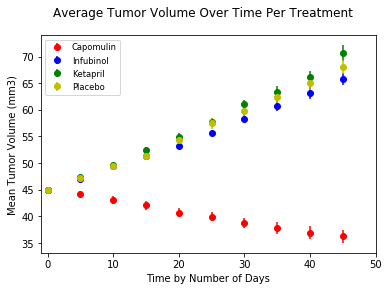

In [16]:
# Generate the Plot (with Error Bars)
x_axis=np.arange(0,46,5)
print(x_axis)

capo_mean=np.array(tumor_merge.loc[tumor_merge['Drug']=="Capomulin",'Mean Tumor Volume (mm3)'])
capo_sem=np.array(tumor_merge.loc[tumor_merge['Drug']=="Capomulin",'Std Err Tumor Volume (mm3)'])

infu_mean=np.array(tumor_merge.loc[tumor_merge['Drug']=="Infubinol",'Mean Tumor Volume (mm3)'])
infu_sem=np.array(tumor_merge.loc[tumor_merge['Drug']=="Infubinol",'Std Err Tumor Volume (mm3)'])

keta_mean=np.array(tumor_merge.loc[tumor_merge['Drug']=="Ketapril",'Mean Tumor Volume (mm3)'])
keta_sem=np.array(tumor_merge.loc[tumor_merge['Drug']=="Ketapril",'Std Err Tumor Volume (mm3)'])

plcb_mean=np.array(tumor_merge.loc[tumor_merge['Drug']=="Placebo",'Mean Tumor Volume (mm3)'])
plcb_sem=np.array(tumor_merge.loc[tumor_merge['Drug']=="Placebo",'Std Err Tumor Volume (mm3)'])

fig, tumor=plt.subplots()
fig.suptitle("Average Tumor Volume Over Time Per Treatment")
tumor.set_xlim(-1,50)
tumor.set_xlabel("Time by Number of Days")
tumor.set_ylabel("Mean Tumor Volume (mm3)")
tumor.errorbar(x_axis,capo_mean,yerr=capo_sem, fmt='o', color='r', label='Capomulin')
tumor.errorbar(x_axis,infu_mean,yerr=infu_sem, fmt='o', color='b', label='Infubinol')
tumor.errorbar(x_axis,keta_mean,yerr=keta_sem, fmt='o', color='g', label='Ketapril')
tumor.errorbar(x_axis,plcb_mean,yerr=plcb_sem, fmt='o', color='y', label='Placebo')
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.show()

# Save the Figure
